# Linear Model For Regression Analysis

## Import Module

In [17]:
# Import some useful module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)
pd.set_option('precision', 4)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Import dataset and linear model
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

## Import dataset

In [3]:
#path = ''
#df = pd.DataFrame( ,index= , columns=[], encoding='')
boston = datasets.load_boston()

## Model Predictors And Responce

In [4]:
col = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
df = pd.DataFrame(boston.data, columns=col)

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
df_R = pd.Series(boston.target)
df_R.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

## Cross-validation

In [7]:
from sklearn.cross_validation import train_test_split

C:\Users\AdamChang\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
x_train, x_test, y_train, y_test = train_test_split(df,df_R,random_state = 42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, random_state=42)

## Training the different model and compute MSE

In [57]:
#Least Square Regression
lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)
predict_lr = lr.predict(x_valid)
print('Linear Regression Model:')
print('\t MSE = {:.4f}'.format(mean_squared_error(y_valid, predict_lr)))
print('\t Training Score: {:.4f}'.format(lr.score(x_train, y_train),4))
print('\t Validation Score: {:.4f}'.format(lr.score(x_valid, y_valid),4))

#Ridge Regression
rg = linear_model.Ridge()
rg.fit(x_train, y_train)
predict_rg = rg.predict(x_valid)
print('Ridge Regression Model:')
print('\t MSE = {:.4f}'.format(mean_squared_error(y_valid, predict_rg)))
print('\t Training Score: {:.4f}'.format(rg.score(x_train, y_train),4))
print('\t Validation Score: {:.4f}'.format(rg.score(x_valid, y_valid),4))

#Lasso Regression
ls = linear_model.Lasso()
ls.fit(x_train, y_train)
predict_ls = ls.predict(x_valid)
print('Lasso Regression Model:')
print('\t MSE = {:.4f}'.format(mean_squared_error(y_valid, predict_ls)))
print('\t Training Score: {:.4f}'.format(ls.score(x_train, y_train),4))
print('\t Validation Score: {:.4f}'.format(ls.score(x_valid, y_valid),4))

#ElasticNet Regression
en = linear_model.ElasticNet()
en.fit(x_train, y_train)
predict_en = en.predict(x_valid)
print('ElasticNet Regression Model:')
print('\t MSE = {:.4f}'.format(mean_squared_error(y_valid, predict_en)))
print('\t Training Score: {:.4f}'.format(en.score(x_train, y_train),4))
print('\t Validation Score: {:.4f}'.format(en.score(x_valid, y_valid),4))

Linear Regression Model:
	 MSE = 32.7084
	 Training Score: 0.7643
	 Validation Score: 0.6702
Ridge Regression Model:
	 MSE = 32.0737
	 Training Score: 0.7611
	 Validation Score: 0.6766
Lasso Regression Model:
	 MSE = 33.8482
	 Training Score: 0.6926
	 Validation Score: 0.6587
ElasticNet Regression Model:
	 MSE = 33.6276
	 Training Score: 0.6906
	 Validation Score: 0.6610


## Tunning Ridge

In [75]:
#Prepare CV dataset
cv_x_data = pd.concat([x_train, x_valid])
cv_y_data = pd.concat([y_train, y_valid])

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
param_grid_R = {'alpha':[0.001,0.01,0.1,1,10,100]}
grid_search_R = GridSearchCV(linear_model.Ridge(), param_grid_R, cv=5)

In [76]:
grid_search_R.fit(cv_x_data, cv_y_data)
print('Best parameter of Ridge is:', grid_search_R.best_params_)
print('Best score of cv is: {:.4f}'.format(grid_search_R.best_score_))

('Best parameter of Ridge is:', {'alpha': 0.1})
Best score of cv is: 0.7170


In [78]:
rg2 = linear_model.Ridge(alpha=0.1)
rg2.fit(cv_x_data, cv_y_data)
predictR2 = rg2.predict(x_test)

print('Ridge Regression Model:')
print('MSE =', mean_squared_error(y_test, predictR2))
print('Training Score: {:.4f}'.format(rg2.score(cv_x_data, cv_y_data)))
print('Testing Score: {:.4f}'.format(rg2.score(x_test, y_test)))

Ridge Regression Model:
('MSE =', 22.17487652763194)
Training Score: 0.7480
Testing Score: 0.6833


## Tunning Lasso regression

In [79]:
param_grid_L = {'alpha':[0.001,0.01,0.1,1,10,100]}
grid_search_L = GridSearchCV(linear_model.Lasso(),param_grid_L,cv=5)
grid_search_L.fit(cv_x_data, cv_y_data)
print('Best parameter of Lasso is:', grid_search_L.best_params_)
print('Best score of cv is:', grid_search_L.best_score_)

('Best parameter of Lasso is:', {'alpha': 0.001})
('Best score of cv is:', 0.7168295597477687)


In [80]:
ls2 = linear_model.Lasso(alpha=0.001)
ls2.fit(cv_x_data, cv_y_data)
predictL3 = ls2.predict(x_test)

print('Lasso Regression Model:\n')
print('MSE =', mean_squared_error(y_test, predictL3))
print('Training Score: {:.4f}'.format(ls2.score(cv_x_data, cv_y_data)))
print('Testing Score: {:.4f}'.format(ls2.score(x_test, y_test)))

Lasso Regression Model:

('MSE =', 22.139310622282096)
Training Score: 0.7481
Testing Score: 0.6838


## Tunning ElasticNet

In [81]:
param_grid_E = {'alpha':[0.001,0.01,0.1,1,10,100],
               'l1_ratio':[x/100 for x in range(1,100,100)]}

In [82]:
grid_search_E = GridSearchCV(linear_model.ElasticNet(),param_grid_E,cv=5)
grid_search_E.fit(cv_x_data, cv_y_data)
print('Best parameter of ElasticNet is:', grid_search_E.best_params_)
print('Best score of cv is:', grid_search_E.best_score_)

C:\Users\AdamChang\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


('Best parameter of ElasticNet is:', {'alpha': 0.001, 'l1_ratio': 0})
('Best score of cv is:', 0.7168775822022203)


In [83]:
en2 = linear_model.ElasticNet(alpha=0.001,l1_ratio=0)
en2.fit(cv_x_data, cv_y_data)
predictE4 = en2.predict(x_test)

print('ElasticNet Regression Model:\n')
print('MSE =', mean_squared_error(y_test, predictE4))
print('Training Score: {:.4f}'.format(en2.score(cv_x_data, cv_y_data)))
print('Testing Score: {:.4f}'.format(en2.score(x_test, y_test)))

ElasticNet Regression Model:

('MSE =', 22.29615248324071)
Training Score: 0.7476
Testing Score: 0.6816


# Forward Stepwise Strategy

In [84]:
df_R2 = pd.DataFrame(df_R)

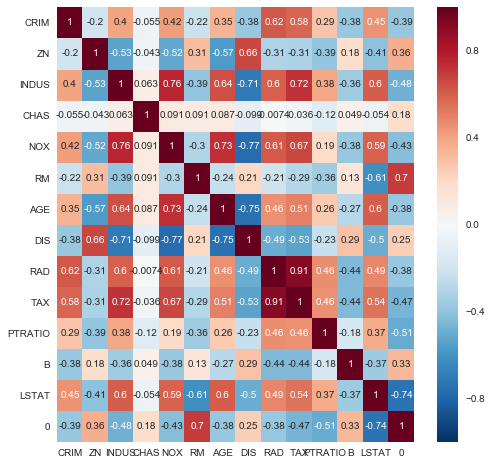

In [86]:
# Use heatmap to view the correlation
df_all = pd.concat([df,df_R2],axis=1)
plt.figure(figsize=(8,8))
sns.heatmap(df_all.corr(),annot=True)

In [87]:
# Sort the correlation to add the preditor one by one.
df_all_corr = df_all.corr()
corr = abs(df_all_corr[0]).sort_values(ascending=False)
corr = corr.drop(0)
corr

LSTAT      0.7377
RM         0.6954
PTRATIO    0.5078
INDUS      0.4837
TAX        0.4685
NOX        0.4273
CRIM       0.3858
RAD        0.3816
AGE        0.3770
ZN         0.3604
B          0.3335
DIS        0.2499
CHAS       0.1753
Name: 0, dtype: float64

In [119]:
# Use the forward stepwise strategy to run the linear square regression.
forward_predictor = pd.DataFrame()
forward_test = pd.DataFrame()
PredictorNum = []
MSE = []
training_score = []
testing_score = []

for i in range(len(corr)):
    mse_value = 0
    forward_predictor[corr.index[i]] = cv_x_data[corr.index[i]]
    forward_test[corr.index[i]] = x_test[corr.index[i]]
    #assign model here
    model= linear_model.Ridge()
    model.fit(forward_predictor,cv_y_data)
    PredictorNum.append(len(forward_predictor.columns))
    mse_value = mean_squared_error(cv_y_data,model.predict(forward_predictor))
    MSE.append(mse_value)
    training_score.append(model.score(forward_predictor,cv_y_data))
    testing_score.append(model.score(forward_test,y_test))
    print('Feature number: {}, MSE = {}'.format(i+1,mse_value))
    
mse = pd.DataFrame({'PredictorNum':PredictorNum,'MSE':MSE,
                    'Train_Score':training_score,'Test_Score':testing_score})

Feature number: 1, MSE = 39.6214156886
Feature number: 2, MSE = 30.878290522
Feature number: 3, MSE = 27.6872316877
Feature number: 4, MSE = 27.6583531261
Feature number: 5, MSE = 27.3867270386
Feature number: 6, MSE = 27.3549125368
Feature number: 7, MSE = 27.1087435112
Feature number: 8, MSE = 26.4974964243
Feature number: 9, MSE = 26.3039015701
Feature number: 10, MSE = 26.2877812184
Feature number: 11, MSE = 25.0754294928
Feature number: 12, MSE = 22.9889482499
Feature number: 13, MSE = 22.5141521603


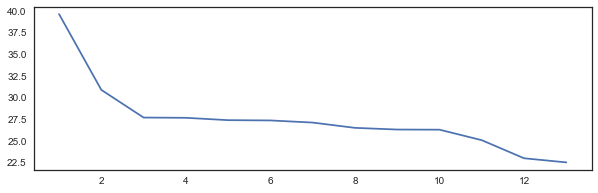

In [121]:
# View the MSE of each quantities of predictors.
plt.figure(figsize=(10,3))
plt.plot(mse['PredictorNum'],mse['MSE'])

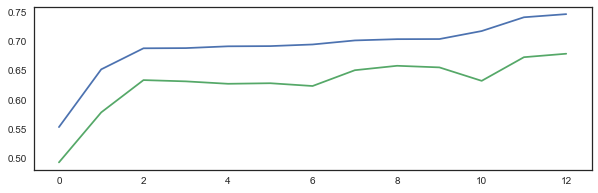

In [123]:
plt.figure(figsize=(10,3))
plt.plot(mse['Train_Score'])
plt.plot(mse['Test_Score'])

In [124]:
mse

,MSE,PredictorNum,Test_Score,Train_Score
0,39.6214,1,0.4929,0.5532
1,30.8783,2,0.5783,0.6518
2,27.6872,3,0.6335,0.6878
3,27.6584,4,0.6313,0.6881
4,27.3867,5,0.6272,0.6912
5,27.3549,6,0.6281,0.6915
6,27.1087,7,0.6234,0.6943
7,26.4975,8,0.6504,0.7012
8,26.3039,9,0.6579,0.7034
9,26.2878,10,0.6552,0.7036


# Forecast the data 

In [ ]:
final_model = linear_model.Lasso(alpha=0.001)
final_model.fit(cv_x_data,cv_y_data)
#prediction = final_model.predict()
#prediction.to_csv('')